In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
X,y =make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.99],flip_y=0)

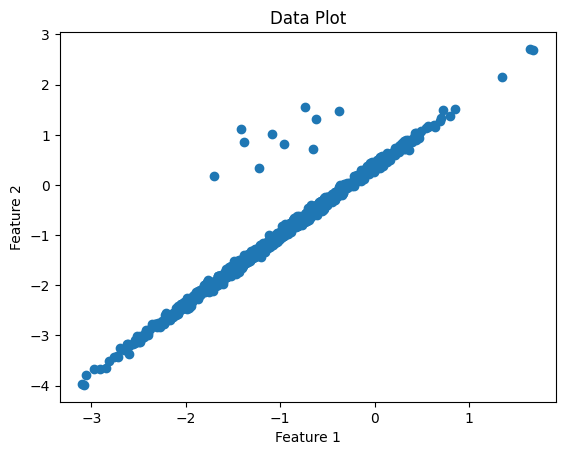

In [6]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], X[:, 1], 'o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Plot')
plt.show()


In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.5,stratify=y)

In [8]:
model=LogisticRegression(solver="liblinear")
model.fit(xtrain,ytrain)
yhat=model.predict(xtest)

In [12]:
print('Accuarcy is ',accuracy_score(ytest,yhat))
print('precision is ',precision_score(ytest,yhat))
print('recall is ',recall_score(ytest,yhat))
print('F-measure is ',f1_score(ytest,yhat))

Accuarcy is  0.992
precision is  1.0
recall is  0.2
F-measure is  0.3333333333333333


In [15]:
confusion_matrix(ytest,yhat)

array([[495,   0],
       [  4,   1]])

In [17]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


In [18]:
print(Counter(y))

Counter({np.int64(0): 990, np.int64(1): 10})


In [19]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [21]:
xunder,yunder=undersample.fit_resample(X,y)

In [24]:
xunder

array([[ 0.04428106,  0.38854787],
       [-2.62344174, -3.18005362],
       [-1.18629151, -1.18717142],
       [-1.50533472, -1.7559135 ],
       [-0.13284577,  0.16662892],
       [-1.65607544, -1.84279849],
       [-1.81937601, -2.11883762],
       [-0.88229217, -0.84745806],
       [ 0.36624077,  0.84255803],
       [-0.22381369,  0.04639543],
       [-0.92227895, -0.86650474],
       [-0.76016193, -0.64679164],
       [-1.25593314, -1.36149967],
       [-2.00975508, -2.35040561],
       [-1.25786521, -1.41155129],
       [-1.22467935, -1.32936431],
       [-2.45855588, -3.05942163],
       [-2.01949571, -2.44242998],
       [-1.80019113, -2.11435059],
       [-0.84356067, -0.84350351],
       [-0.37652004,  1.47633513],
       [-0.61512101,  1.31343926],
       [-0.95859939,  0.81512944],
       [-1.4170349 ,  1.12159643],
       [-1.08413343,  1.02074344],
       [-1.38360554,  0.85878966],
       [-0.73312908,  1.56427961],
       [-1.22490123,  0.32884999],
       [-0.64659207,

In [34]:
x1train,x1test,y1train,y1test=train_test_split(xunder,yunder,test_size=0.5,stratify=yunder)
print('done')

done


In [46]:
mode=LogisticRegression(solver="liblinear", class_weight='balanced')

In [47]:
mode.fit(x1train,y1train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [48]:
yh=mode.predict(x1test)

In [49]:
confusion_matrix(y1test,yh)

array([[9, 1],
       [0, 5]])

In [39]:
accuracy_score(y1test,yh)

0.9333333333333333

In [40]:
from imblearn.over_sampling import SMOTE

In [54]:
oversmapling=SMOTE(sampling_strategy=1)
Xover,yover=oversmapling.fit_resample(X,y)

In [55]:
md=LogisticRegression(solver="liblinear", class_weight='balanced')
x2train,x2test,y2train,y2test=train_test_split(Xover,yover,test_size=0.5,stratify=yover)

In [56]:
md.fit(x2train,y2train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [57]:
yy=md.predict(x2test)

In [58]:
confusion_matrix(y2test,yy)

array([[492,   3],
       [  0, 495]])

In [59]:
accuracy_score (y2test,yy)

0.996969696969697